In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import jax.lax as lax
import numpy as np
from functools import partial
from pycox.datasets import metabric
from survival_jax.metrics import c_index
import survival_jax.km as km
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index

1.0 1.5554853e-08 0.5


In [3]:
df = metabric.read_df()
df.sort_values("duration", inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,duration,event
0,7.220886,5.526921,9.640237,6.258209,0.0,0.0,0.0,0.0,51.419998,0.000000,0
1,5.818934,6.470783,10.672935,5.630679,0.0,0.0,0.0,1.0,75.330002,0.100000,1
2,10.117913,5.335094,9.717084,5.893656,0.0,0.0,0.0,0.0,54.099998,0.766667,0
3,5.705204,8.450347,10.859011,5.667925,0.0,0.0,0.0,1.0,73.639999,1.233333,0
4,5.184060,8.427523,10.361415,5.575082,1.0,0.0,0.0,1.0,73.980003,1.266667,0
...,...,...,...,...,...,...,...,...,...,...,...
1899,5.567494,5.818224,11.343552,5.574574,0.0,1.0,0.0,1.0,58.799999,335.600006,1
1900,7.803252,5.352677,10.012809,6.017503,0.0,0.0,0.0,1.0,67.459999,335.733337,1
1901,6.100280,7.107530,10.501780,6.268520,0.0,0.0,0.0,1.0,29.980000,337.033325,0
1902,5.490514,7.606261,12.297510,6.313382,0.0,1.0,0.0,1.0,63.169998,351.000000,1


In [4]:
for i in range(6):
    df = pd.concat([df, df], axis=0)
df = df.reset_index(drop=True)

In [5]:
times = df.duration.to_numpy()
events = df.event.to_numpy()

In [9]:
kmf = KaplanMeierFitter()

In [10]:
kmf.fit(times, event_observed=events)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 121856 total observations, 51264 right-censored observations>

<AxesSubplot:xlabel='timeline'>

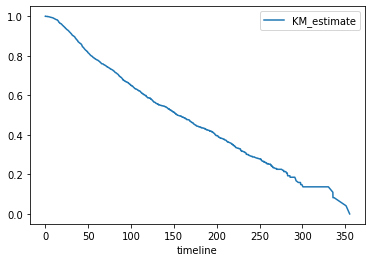

In [11]:
kmf.survival_function_.plot()

In [12]:
haz = np.array([kmf.median_survival_time_] * len(times))

In [16]:
events.shape

(121856,)

In [22]:
%timeit -n10 -r3 c_index(haz, times, events)

2.86 s ± 422 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [23]:
%timeit -n10 -r3 c_index(haz, times, events)

3.03 s ± 444 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [24]:
%timeit -n10 -r3 concordance_index(times, haz, events)

107 ms ± 904 µs per loop (mean ± std. dev. of 3 runs, 10 loops each)
